In [135]:
import glob
import cv2
import matplotlib.pyplot as plt
from random import choice, randint
import numpy as np
import tqdm

In [136]:
base_path = "./resource/"

background = glob.glob("./resource/bg*")
increase_engraving = glob.glob("./resource/increase_engraving*")
decrease_engraving = glob.glob("./resource/decrease_engraving*")
fail = glob.glob("./resource/fail*")[0]
increase_point = glob.glob("./resource/increase_point*") + [fail]
decrease_point = glob.glob("./resource/decrease_point*") + [fail]
ui = glob.glob("./resource/ui*")[0]

100%|██████████| 1000/1000 [02:17<00:00,  7.27it/s]


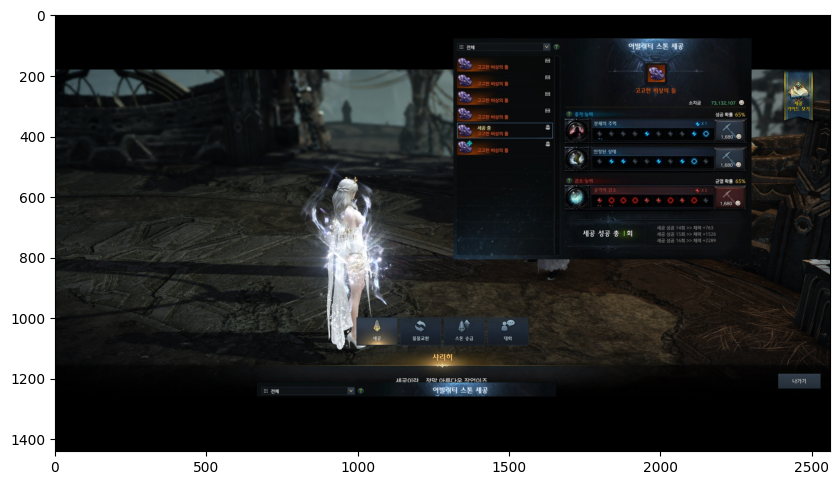

In [137]:
ui_img = cv2.imread(ui)

for idx in tqdm.tqdm(range(1000)):
    f = open(f"../data/{idx}.txt", "w")
    bg = cv2.imread(choice(background))
    
    w = randint(0, 1575)
    h = randint(0, 710)
    
    result_img = np.copy(ui_img)
    result_img[264:264+83, 366:366+83] = cv2.imread(choice(increase_engraving))
    f.write(f"0 {(w+366+41.5)/2560} {(h+264+41.5)/1440} {83/2560} {83/1440}\n")
    result_img[357:357+83, 366:366+83] = cv2.imread(choice(increase_engraving))
    f.write(f"0 {(w+366+41.5)/2560} {(h+357+41.5)/1440} {83/2560} {83/1440}\n")
    result_img[484:484+83, 366:366+83] = cv2.imread(choice(decrease_engraving))
    f.write(f"0 {(w+366+41.5)/2560} {(h+484+41.5)/1440} {83/2560} {83/1440}\n")

    for i in range(0, 39*10, 39):
        result_img[300:300+30, 469+i:469+i+30] = cv2.imread(choice(increase_point))
        f.write(f"1 {(w+469+i+15-1)/2560} {(h+300+15)/1440} {22/2560} {22/1440}\n")
    for i in range(0, 39*10, 39):
        result_img[391:391+30, 469+i:469+i+30] = cv2.imread(choice(increase_point))
        f.write(f"1 {(w+469+i+15-1)/2560} {(h+391+15)/1440} {22/2560} {22/1440}\n")
    for i in range(0, 39*10, 39):
        result_img[520:520+30, 469+i:469+i+30] = cv2.imread(choice(decrease_point))
        f.write(f"1 {(w+469+i+15-1)/2560} {(h+520+15)/1440} {22/2560} {22/1440}\n")
        
    bg[h:h+730, w:w+985] = result_img
    
    cv2.imwrite(f"../data/{idx}.png", bg)
    f.close()

fig, ax = plt.subplots(figsize=(10, 10), ncols=1, nrows=1)
ax.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))